In [761]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [762]:
df = pd.read_csv('winequality-red.csv')

In [763]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [764]:
#Information about the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: xlabel='quality', ylabel='fixed acidity'>

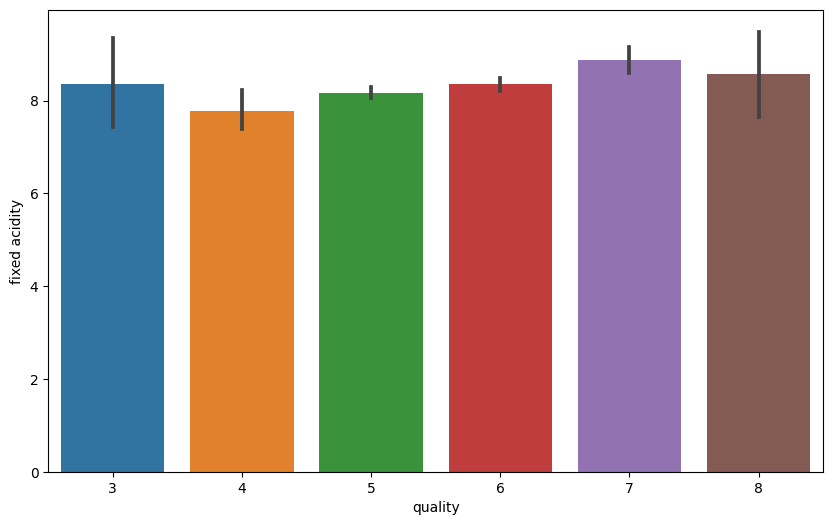

In [765]:
#Here we see that fixed acidity (фіксована кислотність) does not give any specification (конкретики) to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

<Axes: xlabel='quality', ylabel='volatile acidity'>

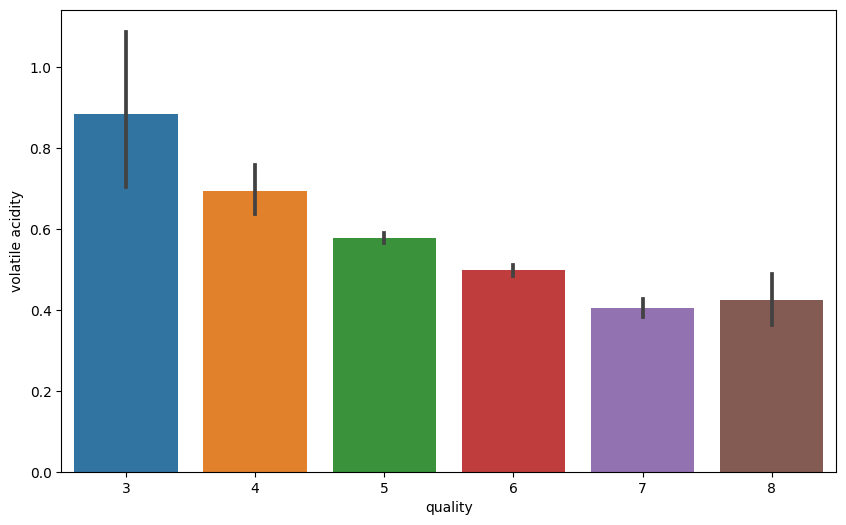

In [766]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

<Axes: xlabel='quality', ylabel='citric acid'>

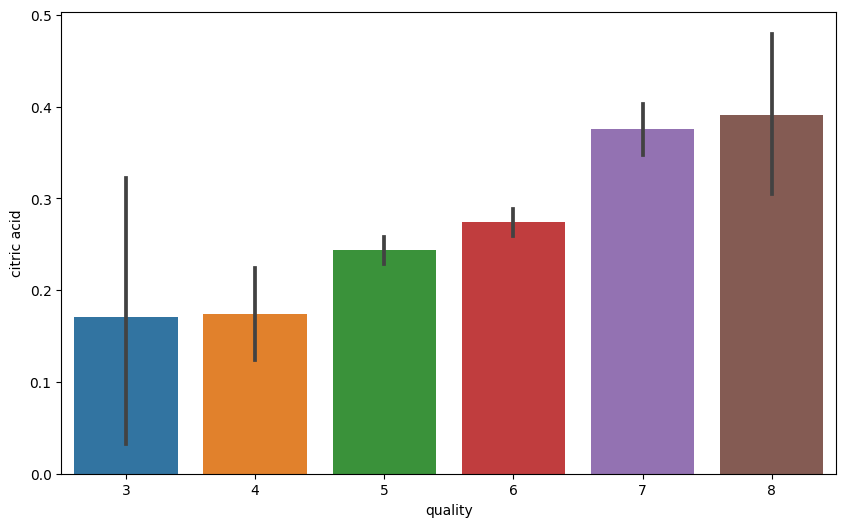

In [767]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

<Axes: xlabel='quality', ylabel='residual sugar'>

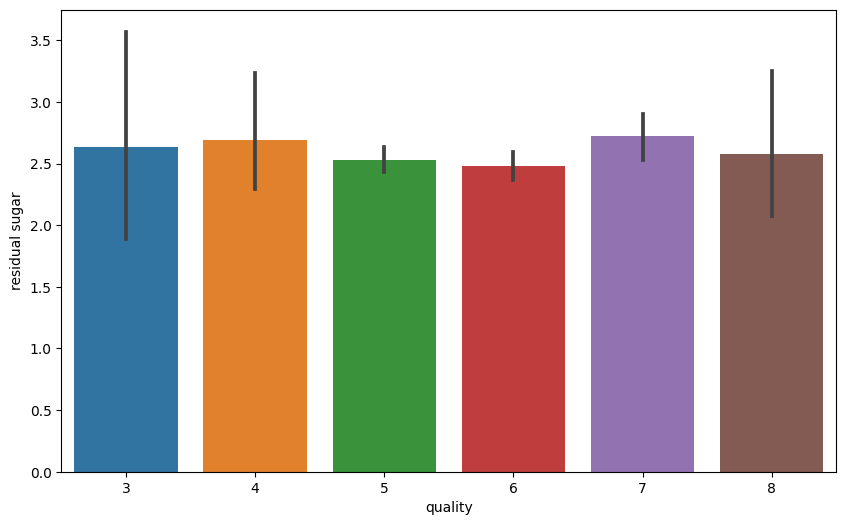

In [768]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

<Axes: xlabel='quality', ylabel='chlorides'>

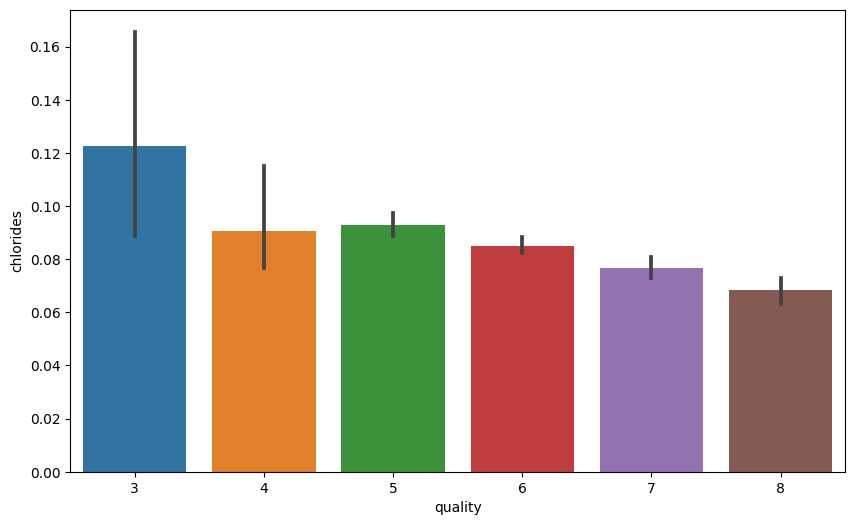

In [769]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

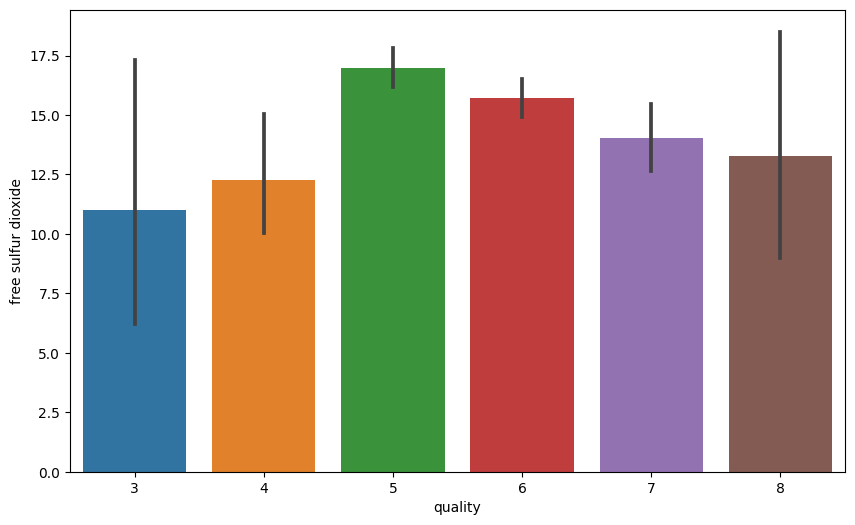

In [770]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

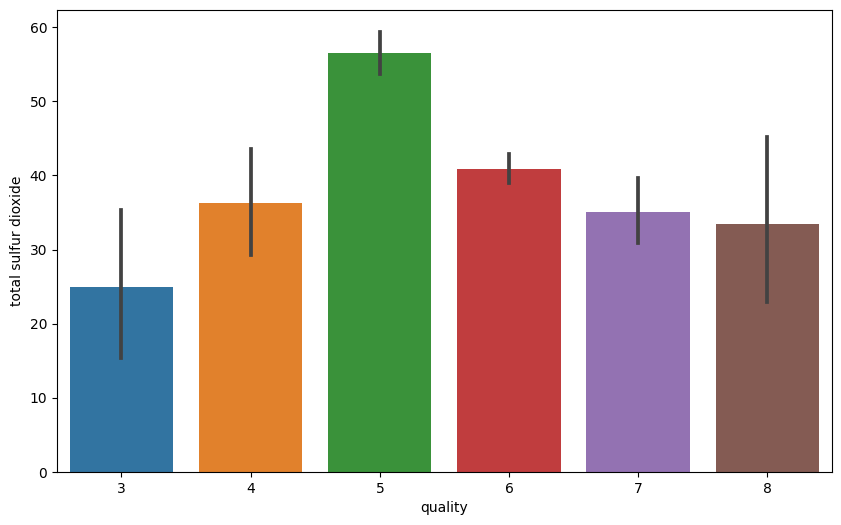

In [771]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

<Axes: xlabel='quality', ylabel='sulphates'>

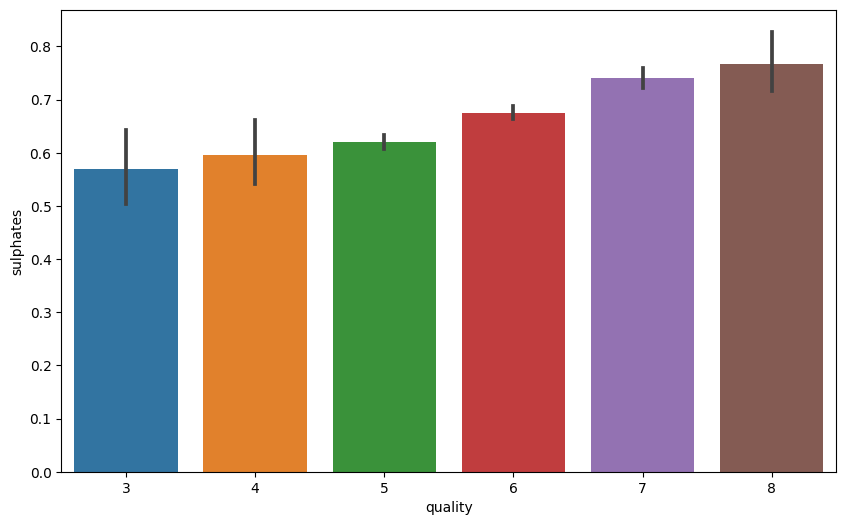

In [772]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

<Axes: xlabel='quality', ylabel='alcohol'>

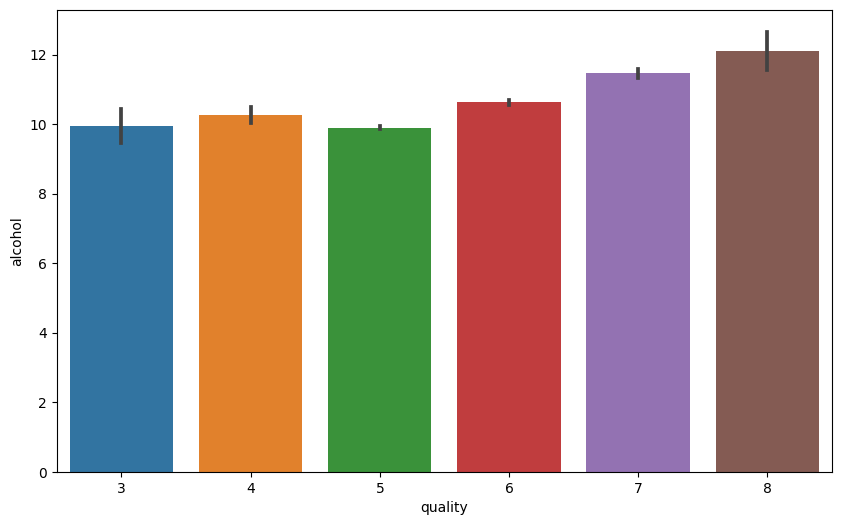

In [773]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

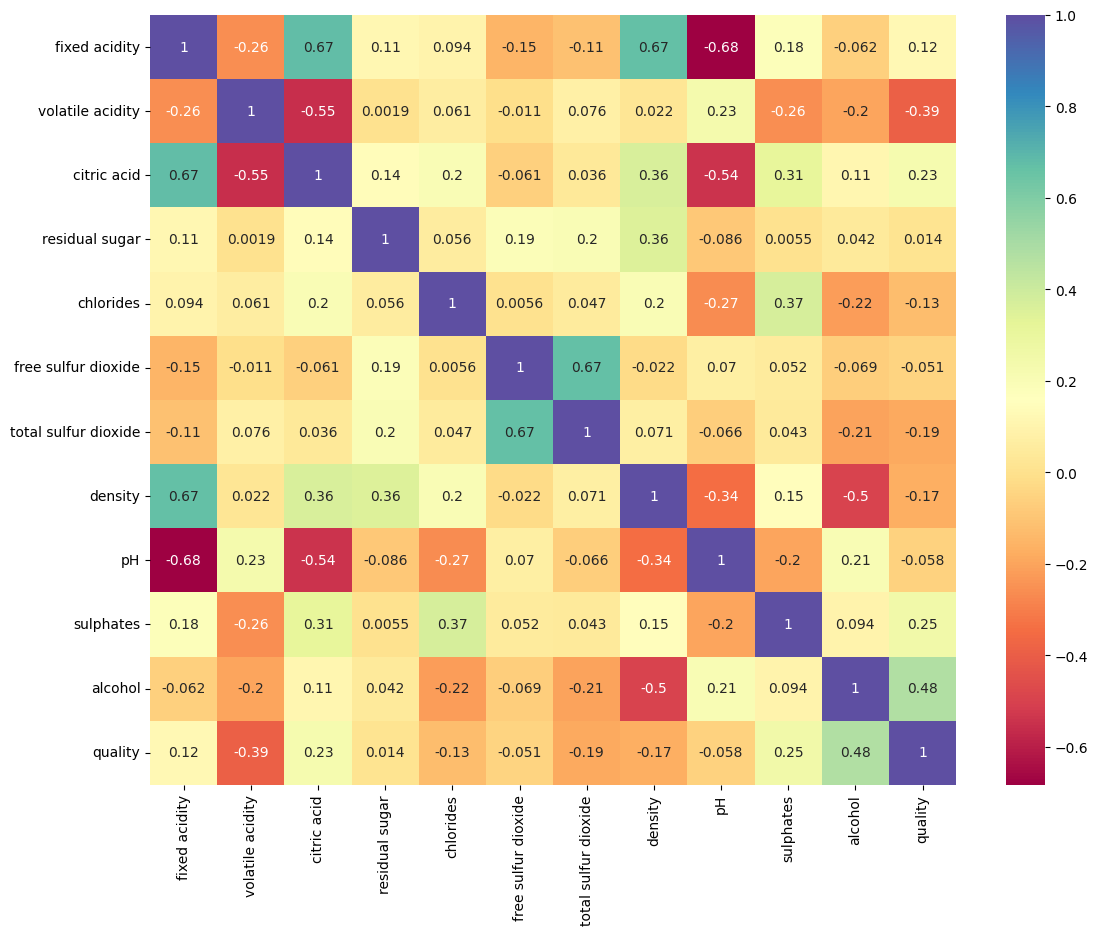

In [774]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Spectral)
plt.show()

In [775]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [776]:
#Count of each target variable
from collections import Counter
Counter(df['quality'])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

<Axes: xlabel='quality', ylabel='count'>

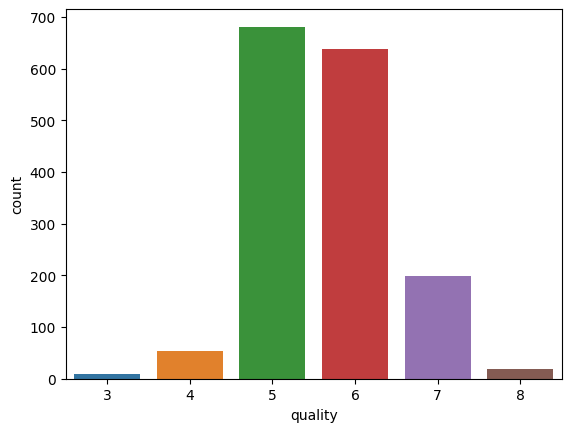

In [777]:
#Count of the target variable
sns.countplot(x='quality', data=df)

In [778]:
#Making binary classificaion for the target variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [779]:
#Now lets assign a labels to our target variable
label_quality = LabelEncoder()

In [780]:
#Bad becomes 0 and good becomes 1 
df['quality'] = label_quality.fit_transform(df['quality'])

In [781]:
df['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [782]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [783]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [784]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [785]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [786]:
#Stochastic Gradient Decent Classifier
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [787]:
def evaluate_classification(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    return accuracy, report, confusion

In [788]:
accuracy, report, confusion = evaluate_classification(y_test, pred_sgd)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")

Accuracy: 
0.840625
Report: 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       273
           1       0.41      0.19      0.26        47

    accuracy                           0.84       320
   macro avg       0.64      0.57      0.59       320
weighted avg       0.80      0.84      0.82       320

Confusion: 
[[260  13]
 [ 38   9]]


In [789]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

In [790]:
accuracy, report, confusion = evaluate_classification(y_test, pred_lr)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")

Accuracy: 
0.875
Report: 
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

Confusion: 
[[268   5]
 [ 35  12]]


In [791]:
#Decision Trees
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)

In [792]:
accuracy, report, confusion = evaluate_classification(y_test, pred_dt)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")

Accuracy: 
0.853125
Report: 
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       273
           1       0.50      0.49      0.49        47

    accuracy                           0.85       320
   macro avg       0.71      0.70      0.70       320
weighted avg       0.85      0.85      0.85       320

Confusion: 
[[250  23]
 [ 24  23]]


In [793]:
def rmse(y_true, y_pred):
    mse = np.mean((y_pred - y_true) ** 2)
    rmse = np.sqrt(mse)
    return rmse

def mse(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

In [794]:
print(rmse(y_test, pred_sgd))
print(rmse(y_test, pred_lr))
print(rmse(y_test, pred_dt))

0.3992179855667828
0.3535533905932738
0.3832427429188973


In [795]:
print(mse(y_test, pred_sgd))
print(mse(y_test, pred_lr))
print(mse(y_test, pred_dt))

0.159375
0.125
0.146875


In [796]:
print(mae(y_test, pred_sgd))
print(mae(y_test, pred_lr))
print(mae(y_test, pred_dt))

0.159375
0.125
0.146875


In [797]:
from sklearn.inspection import permutation_importance

results = permutation_importance(sgd, X_test, y_test, n_repeats=10, random_state=42)

for i in range(X_test.shape[1]):
    print(f"{i}: {results.importances_mean[i]:.3f} +/- {results.importances_std[i]:.3f}")

0: -0.002 +/- 0.002
1: 0.003 +/- 0.005
2: -0.002 +/- 0.003
3: 0.001 +/- 0.009
4: 0.000 +/- 0.000
5: 0.005 +/- 0.006
6: 0.010 +/- 0.007
7: -0.002 +/- 0.002
8: 0.001 +/- 0.002
9: 0.010 +/- 0.010
10: 0.017 +/- 0.011


In [798]:
results = permutation_importance(lr, X_test, y_test, n_repeats=10, random_state=42)

for i in range(X_test.shape[1]):
    print(f"{i}: {results.importances_mean[i]:.3f} +/- {results.importances_std[i]:.3f}")

0: 0.007 +/- 0.007
1: 0.014 +/- 0.006
2: -0.000 +/- 0.003
3: 0.008 +/- 0.007
4: 0.008 +/- 0.005
5: 0.010 +/- 0.003
6: 0.014 +/- 0.007
7: 0.023 +/- 0.008
8: 0.003 +/- 0.003
9: 0.029 +/- 0.006
10: 0.022 +/- 0.012


In [799]:
results = permutation_importance(dt, X_test, y_test, n_repeats=10, random_state=42)

for i in range(X_test.shape[1]):
    print(f"{i}: {results.importances_mean[i]:.3f} +/- {results.importances_std[i]:.3f}")

0: 0.012 +/- 0.003
1: 0.064 +/- 0.012
2: 0.020 +/- 0.011
3: 0.021 +/- 0.009
4: 0.003 +/- 0.006
5: 0.013 +/- 0.005
6: 0.018 +/- 0.004
7: 0.004 +/- 0.006
8: 0.004 +/- 0.003
9: 0.025 +/- 0.008
10: 0.054 +/- 0.014
